In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch.nn import MaxPool2d,Conv2d,Linear,ReLU,BatchNorm2d,BatchNorm1d
from torch import optim

C:\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:


IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(16,16), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [4]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=composed)
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=composed
                                               )  


26422272it [00:14, 1773074.47it/s]                              


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



29696it [00:00, 98417.82it/s]                          


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



4422656it [00:03, 1171784.13it/s]                             


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



6144it [00:00, 3069295.35it/s]          
C:\Python\Python39\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw

Processing...
Done!


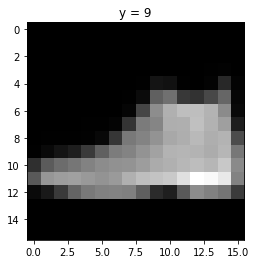

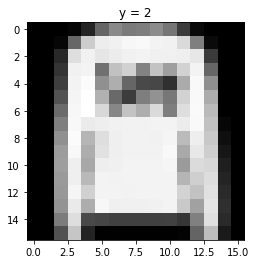

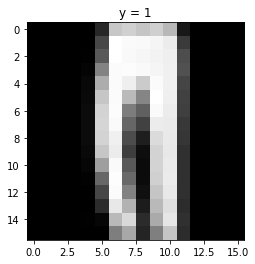

In [5]:
for n,data_sample in enumerate(test_set):

    show_data(data_sample)
    plt.show()
    if n==2:
        break

In [6]:
class model1(nn.Module):
  def __init__(self,out_1=16, out_2=32):
    super(model1, self).__init__()
    self.layer1=Conv2d(in_channels=1, out_channels=out_1,kernel_size=5, padding=2)
    self.batch1=BatchNorm2d(out_1)
    self.max1=MaxPool2d(kernel_size=2)
    
    self.layer2=Conv2d(in_channels=out_1, out_channels=out_2,kernel_size=5, padding=2)
    self.batch2=BatchNorm2d(out_2)
    self.max2=MaxPool2d(kernel_size=2)
    
    self.layer3=Linear(out_2*4*4,10)
    self.batch3=BatchNorm1d(10)
  
  def forward(self,x):
    x=self.layer1(x)
    x=self.batch1(x)
    x=torch.relu(x)
    x=self.max1(x)
                
    x=self.layer2(x)
    x=self.batch2(x)
    x=torch.relu(x)
    x=self.max2(x)
    
    x = x.view(x.size(0), -1)
    
    x=self.layer3(x)
    x=self.batch3(x)
    
    return x

In [7]:
model = model1(out_1=16, out_2=32)

In [8]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=100)

In [9]:

n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(test_set)
COST=0
for epoch in range(0,n_epochs):
    COST=0
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        COST+=loss.data
        
    cost_list.append(COST)
    correct=0
        #perform a prediction on the validation  data  
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)

In [10]:
print(accuracy_list)
print(COST)

[0.8594, 0.8697, 0.8752, 0.8774, 0.8804, 0.8798, 0.8811, 0.883, 0.8808, 0.8819]
tensor(132.6447)


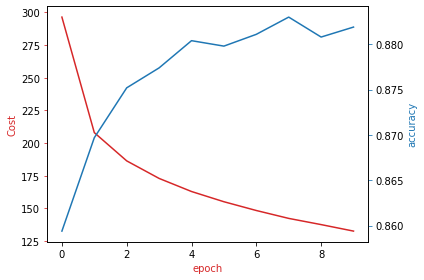

In [11]:
a, b = plt.subplots()
color = 'tab:red'
b.plot(cost_list, color=color)
b.set_xlabel('epoch', color=color)
b.set_ylabel('Cost', color=color)
b.tick_params(axis='y', color=color)
    
c = b.twinx()  
color = 'tab:blue'
c.set_ylabel('accuracy', color=color) 
c.set_xlabel('epoch', color=color)
c.plot( accuracy_list, color=color)
c.tick_params(axis='y', color=color)
a.tight_layout()